In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False
import os
import joblib

In [2]:
X = joblib.load('X')
y = joblib.load('y')
X.shape, y.shape 

((8584, 80, 3), (8584,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, 
                                                    stratify = y)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model = keras.Sequential()

model.add(layers.Convolution1D(32, (3), activation='relu', input_shape=(80, 3), padding='same'))
#model.summary()
model.add(layers.Convolution1D(64, (5), activation='relu', padding='same'))

model.add(layers.Dense(32))
model.add(layers.LSTM(128, return_sequences=True,input_shape=(80, 32),dropout=0.1))
model.add(layers.SimpleRNN(128,dropout=0.1))
model.add(layers.Dense(32))

model.add(layers.Dense(6,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 80, 32)            320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 80, 64)            10304     
_________________________________________________________________
dense (Dense)                (None, 80, 32)            2080      
_________________________________________________________________
lstm (LSTM)                  (None, 80, 128)           82432     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1

In [6]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [7]:
history = model.fit(X_train,y_train, epochs=70, validation_data=(X_test,y_test))

Epoch 1/70
215/215 [==============================] - 45s 184ms/step - loss: 0.8842 - accuracy: 0.6661 - val_loss: 0.6730 - val_accuracy: 0.7612
Epoch 2/70
215/215 [==============================] - 37s 172ms/step - loss: 0.4817 - accuracy: 0.8148 - val_loss: 0.3937 - val_accuracy: 0.8556
Epoch 3/70
215/215 [==============================] - 35s 161ms/step - loss: 0.3616 - accuracy: 0.8540 - val_loss: 0.2928 - val_accuracy: 0.8963
Epoch 4/70
215/215 [==============================] - 34s 158ms/step - loss: 0.3042 - accuracy: 0.8889 - val_loss: 0.3722 - val_accuracy: 0.8660
Epoch 5/70
215/215 [==============================] - 39s 183ms/step - loss: 0.3034 - accuracy: 0.8854 - val_loss: 0.2312 - val_accuracy: 0.9237
Epoch 6/70
215/215 [==============================] - 34s 159ms/step - loss: 0.1958 - accuracy: 0.9299 - val_loss: 0.1953 - val_accuracy: 0.9243
Epoch 7/70
215/215 [==============================] - 28s 128ms/step - loss: 0.2043 - accuracy: 0.9275 - val_loss: 0.1953 - val_ac

215/215 [==============================] - 32s 150ms/step - loss: 0.0282 - accuracy: 0.9903 - val_loss: 0.1533 - val_accuracy: 0.9685
Epoch 58/70
215/215 [==============================] - 34s 160ms/step - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.1242 - val_accuracy: 0.9703
Epoch 59/70
215/215 [==============================] - 34s 157ms/step - loss: 0.0327 - accuracy: 0.9906 - val_loss: 0.0967 - val_accuracy: 0.9744
Epoch 60/70
215/215 [==============================] - 34s 158ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.1495 - val_accuracy: 0.9668
Epoch 61/70
215/215 [==============================] - 35s 161ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.1201 - val_accuracy: 0.9691
Epoch 62/70
215/215 [==============================] - 32s 148ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.1075 - val_accuracy: 0.9720
Epoch 63/70
215/215 [==============================] - 34s 157ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.1338 - val_accurac

In [8]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

      # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show() 

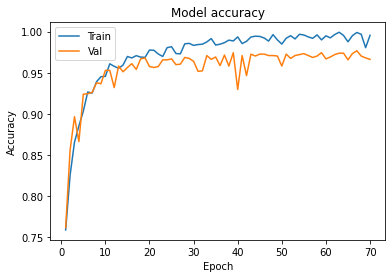

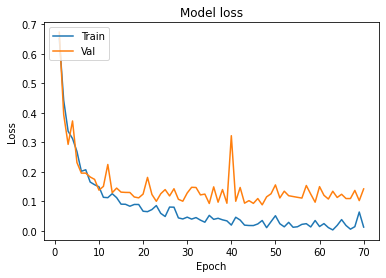

In [9]:
plot_learningCurve(history, 70) 

In [10]:
y_pred = model.predict_classes(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 

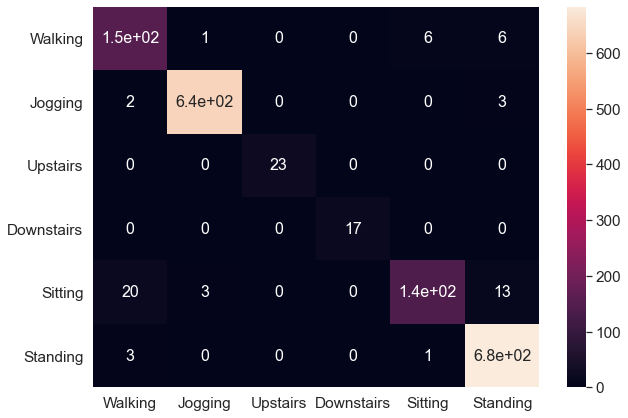

In [12]:
index = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
mat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(mat, index, index)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show() 

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       167
           1       0.99      0.99      0.99       647
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        17
           4       0.95      0.80      0.87       176
           5       0.97      0.99      0.98       687

    accuracy                           0.97      1717
   macro avg       0.96      0.95      0.96      1717
weighted avg       0.97      0.97      0.97      1717

